# Test Transquest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# NER : 

In [ ]:
import spacy
from spacy.tokens import Span


In [ ]:
nlp = spacy.load('en_core_web_sm')
# nlp_ger = spacy.load('drive/MyDrive/Colab Notebooks/de_core_news_sm') 

In [ ]:
list_ent = {
    "PRODUCT" : "product",
    "LOC" : "Himalayas",
    "DATE" : "this year",
    "TIME" : "night",
    "MONEY" : "three dollars",
    "PERSON" : "David",
    "ORG" : "IBM",
    "GPE" : "Paris",
    "PERCENT" : "four percent",
    "CARDINAL" : "three"
}

In [ ]:
def edit_ner(sen, nlp, list_ent):
    doc = nlp(sen)
    new_sentence = ""
    index_ent = 0 
    index_tok = 0
    while (index_tok < len(doc)):
        token = doc[index_tok]
        if token.ent_type_ != '':
            l_ent = -(doc.ents[index_ent].start-doc.ents[index_ent].end)
            if token.ent_type_ in list_ent:
                replacement_word = list_ent[token.ent_type_]
                new_sentence += replacement_word 
            else : 
                new_sentence += doc.ents[index_ent].text 
            index_tok+=l_ent
            index_ent+=1 
        else:
            new_sentence += token.text 
            index_tok+=1

        if (index_tok <len(doc) and not doc[index_tok].is_punct):
            new_sentence += token.whitespace_
    return str(new_sentence)

In [ ]:
list_ent_german = {
"PRODUCT" : "Produkt",
"LOC" : "Himalaya",
"DATE" : "dieses Jahr",
"TIME" : "Nacht",
"MONEY" : "drei Dollar",
"PERSON" : "David",
"ORG" : "IBM",
"GPE" : "Paris",
"PERCENT" : "vier Prozent",
"CARDINAL" : "drei"
}

In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Colab Notebooks/output_quest.csv")

In [ ]:
df.head(3)

In [ ]:
src_exm = df['src'][0]
src_exm

In [ ]:
edit_ner(src_exm, nlp, list_ent)

In [ ]:
mt_exm = df['mt'][0]
mt_exm

In [ ]:
edit_ner(mt_exm, nlp, list_ent_german)

In [ ]:
df_tmp = df.head(5)
df_tmp

In [ ]:
df["new_src"] = df['src'].apply( lambda x : str(edit_ner((x), nlp, list_ent)) )

In [ ]:
df["new_mt"] = df['mt'].apply( lambda x : str(edit_ner((x), nlp, list_ent_german)) )

In [ ]:
!pip install transquest

In [ ]:
import torch

from transquest.algo.sentence_level.monotransquest.run_model import MonoTransQuestModel


model = MonoTransQuestModel("xlmroberta", "TransQuest/monotransquest-da-multilingual", num_labels=1, use_cuda=torch.cuda.is_available())


In [ ]:
def transquest_model(src, tgt):    
    predictions, _ = model.predict([[src,tgt]])
    return round(predictions.item(),6)

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/output_quest_ner.csv")

In [ ]:
df["tquest_ner"] = df.apply( lambda x : transquest_model(x["new_src"], x["new_mt"]) , axis=1)

In [ ]:
df.to_csv("drive/MyDrive/Colab Notebooks/output_quest_ner.csv")

In [13]:
import pandas as pd
df = pd.read_csv("output_quest_ner.csv")
df.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score,transquest,new_src,new_mt,tquest_ner
0,0,0,0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,4.331309,0.808846,0.744348,David y David visited David at Paris in this y...,dieses Jahr besuchte David y David in Paris.,0.745117
1,1,1,1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,4.174426,0.890099,0.733772,"however, a disappointing ninth in Paris meant ...",eine enttäuschende David in Paris bedeutete je...,0.669922
2,2,2,2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ...","in seinem Tagebuch schrieb Chase , dass die Fr...",23,0.782187,23,3.736856,4.120092,0.790553,0.702712,"in his diary, IBM wrote that the release of IB...","in Paris Paris, IBM schrieb, dass die David un...",0.631836


In [16]:
# col = df.columns.tolist()
# df.drop(columns=col[:3], inplace = True)
# df.to_csv("output_quest_ner.csv")

In [18]:
df.head(3)

,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score,transquest,new_src,new_mt,tquest_ner
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,4.331309,0.808846,0.744348,David y David visited David at Paris in this y...,dieses Jahr besuchte David y David in Paris.,0.745117
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,4.174426,0.890099,0.733772,"however, a disappointing ninth in Paris meant ...",eine enttäuschende David in Paris bedeutete je...,0.669922
2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ...","in seinem Tagebuch schrieb Chase , dass die Fr...",23,0.782187,23,3.736856,4.120092,0.790553,0.702712,"in his diary, IBM wrote that the release of IB...","in Paris Paris, IBM schrieb, dass die David un...",0.631836


In [19]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score

# Compute Pearson correlation coefficient
def pearsonr_metric (x, y):
    r, _ = pearsonr(y, x)
    return ("Pearson correlation coefficient: %.3f" % r)

# Compute mean absolute error
def mae_metric (x, y):
    mae = np.mean(np.abs(y - x))
    return ("Mean absolute error: %.3f" % mae)

# Compute root mean squared error
def rmse_metric (x, y):
    rmse = np.sqrt(np.mean((y - x)**2))
    return ("Root mean squared error: %.3f" % rmse)




In [20]:
print("transquest results using spacy NER")
print(mae_metric(df["final_score"],df["tquest_ner"]))
print(rmse_metric(df["final_score"],df["tquest_ner"]))
print(pearsonr_metric(df["final_score"],df["tquest_ner"]))

transquest results using spacy NER
Mean absolute error: 0.168
Root mean squared error: 0.203
Pearson correlation coefficient: 0.121


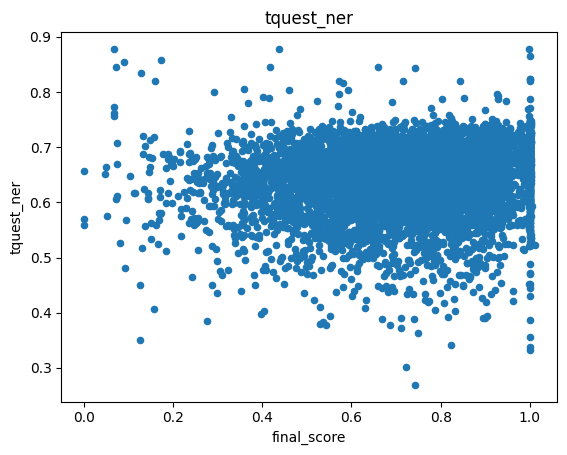

In [28]:
import matplotlib.pyplot as plt
fig = df.plot.scatter(x="final_score", y="tquest_ner", title="tquest_ner")
plt.show()